# image Processing HW1

In [37]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from google.colab import files
from google.colab.patches import cv2_imshow
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
from PIL import Image
# baraye upload karadane aks ha


Saving img1.jpg to img1 (3).jpg


Saving img2.jpg to img2 (3).jpg


Saving img3.jpg to img3 (2).jpg


Saving img4.jpg to img4 (2).jpg


Saving ref.jpg to ref (2).jpg


Saving src.jpg to src (2).jpg


Q2 - Part 1

In [38]:
def calc_hist(image):
  '''
  calculate image histogram
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    hist (ndarray): computed input image histogram
  '''
  hist = np.zeros(256,dtype=int)
  ############
  # Your code
  # Start
  (n,m) = (image.shape)
  k = 0 
  for k in range(0, 256):
    count1 = 0
      
        # loops to traverse each pixel in 
        # the image 
    for i in range(n):
      for j in range(m):
        if image[i, j]== k:
          count1 = count1+1
    hist[k] = count1

  # End
  return hist


**compute histogram with opencv**

In [ ]:
img = cv2.imread('img1.jpg',cv2.IMREAD_GRAYSCALE)
############
# Your code
# Start
cv_hist = cv2.calcHist([img],[0],None,[256],[0,256])
# End

test **(don't change next cell)**

Text(0.5, 1.0, 'Opencv histogram')

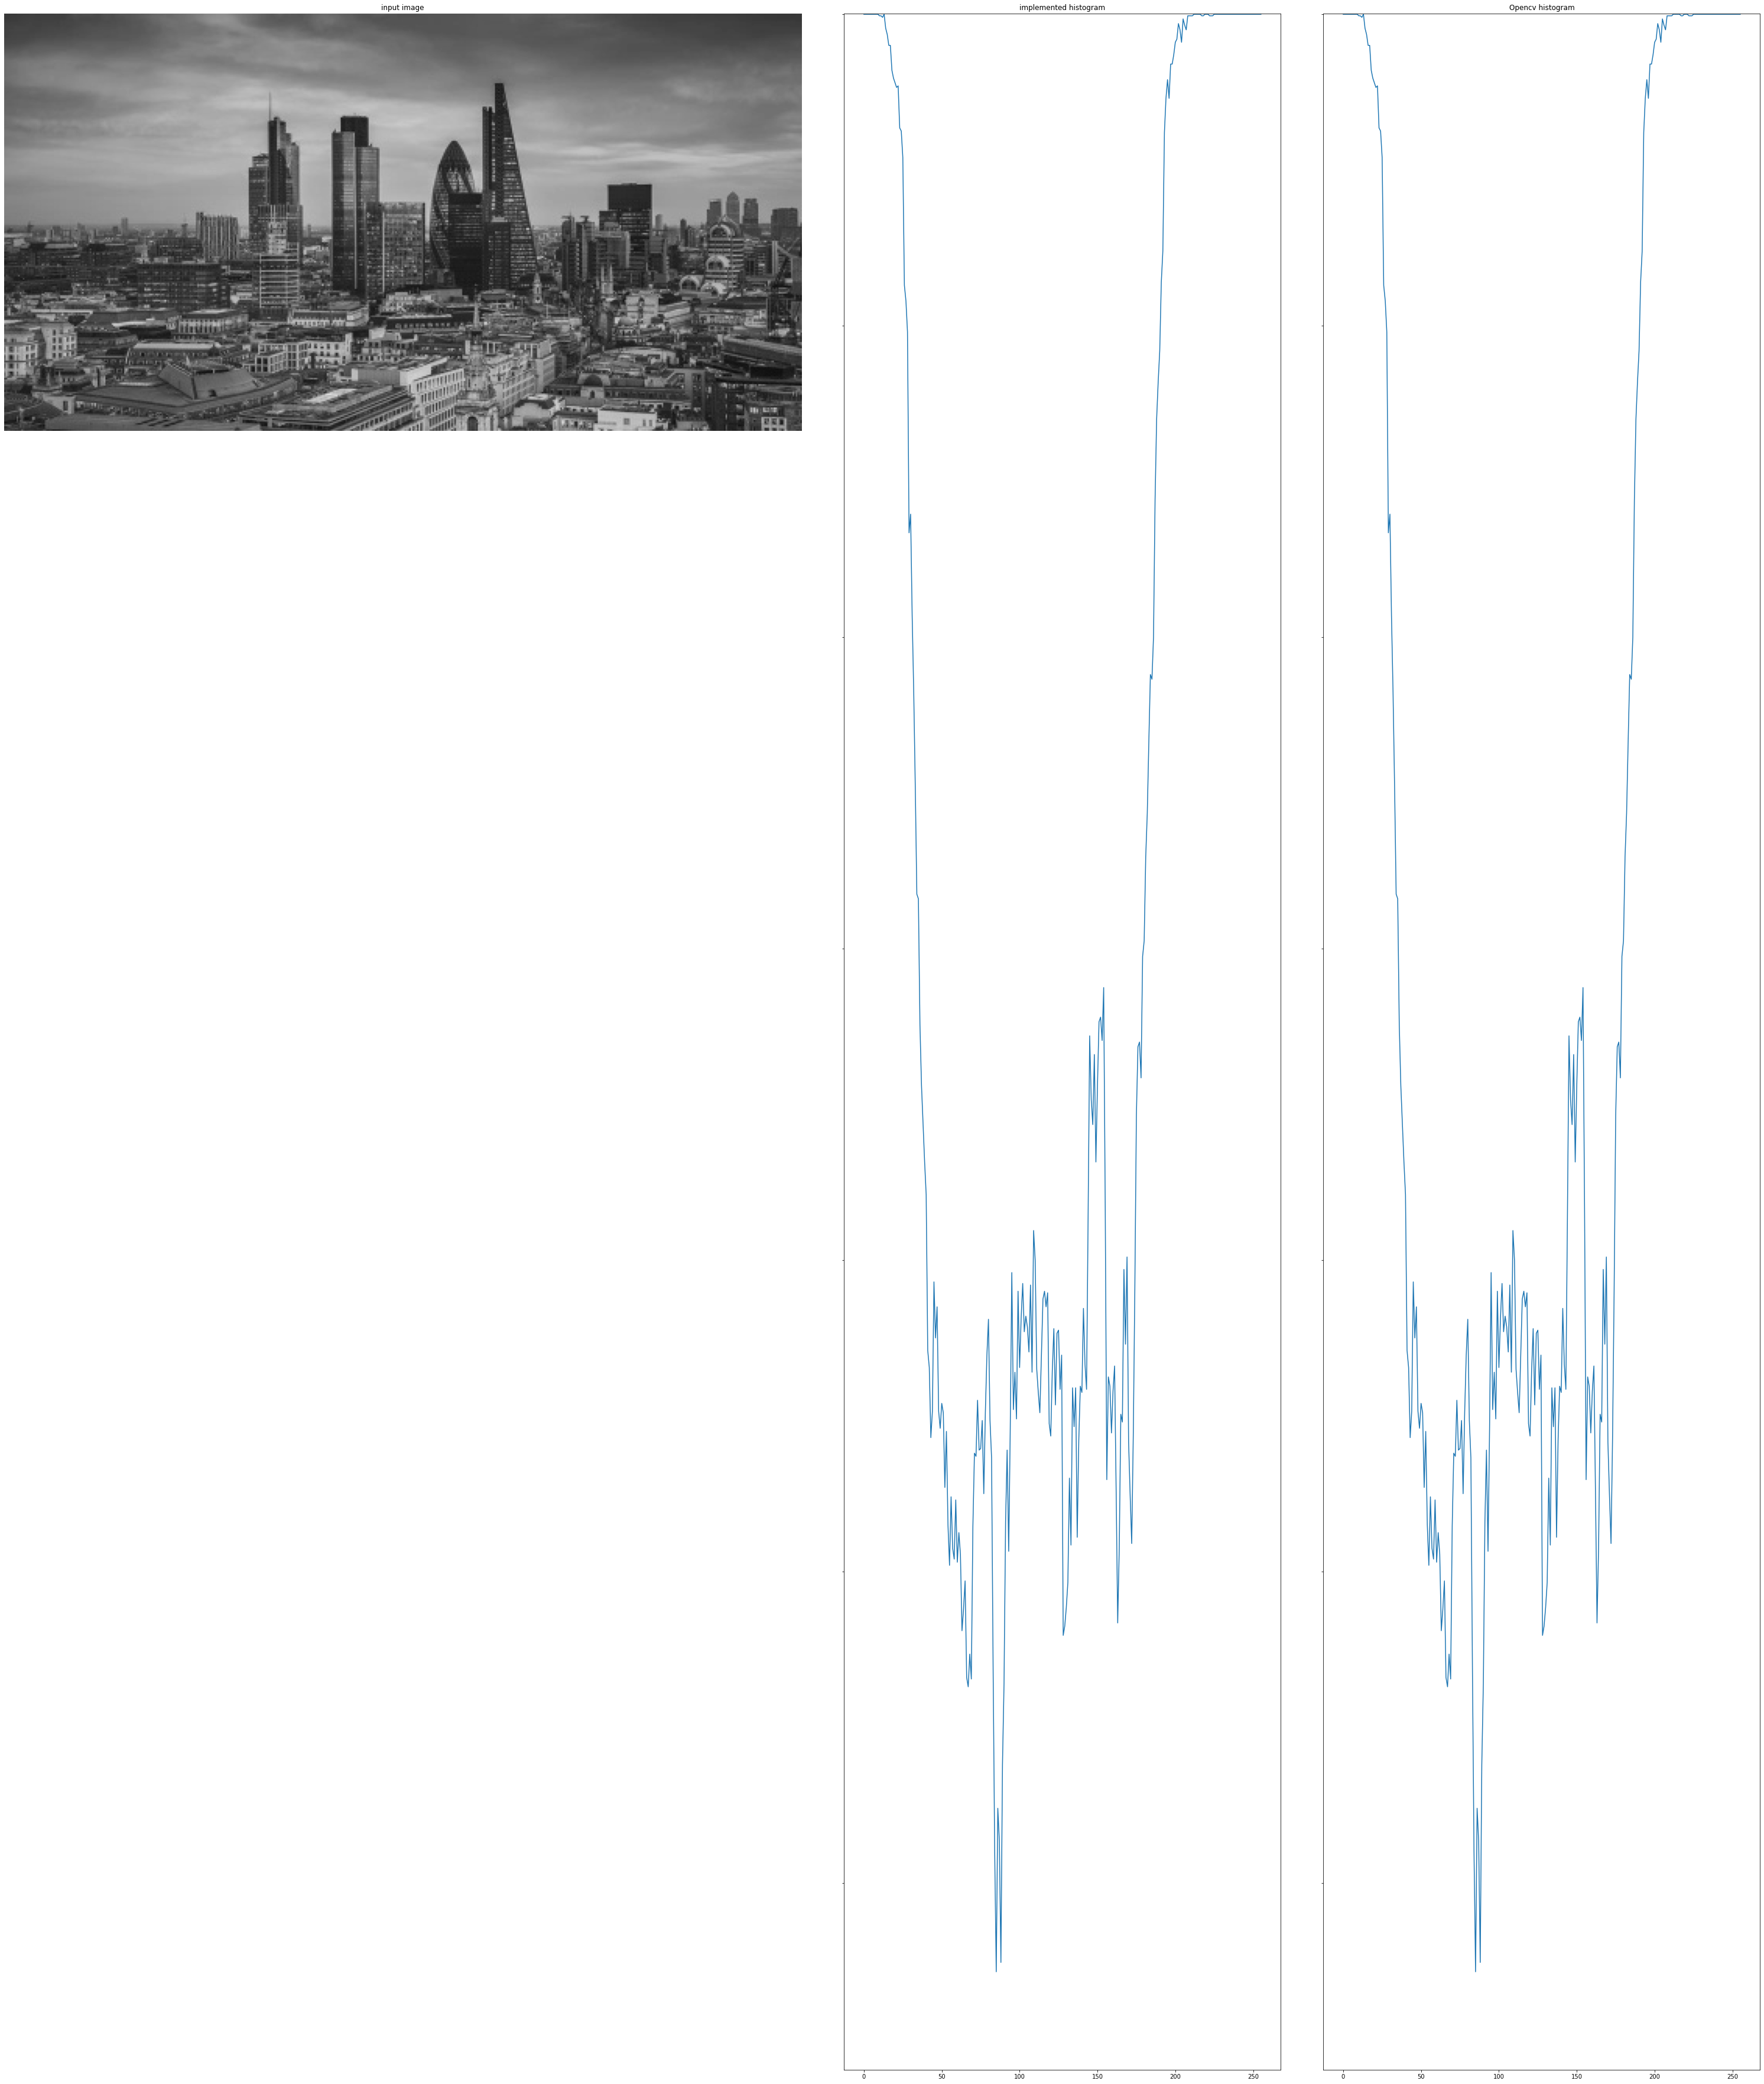

In [ ]:
img = cv2.imread('img1.jpg',cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(64,64))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 3), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('implemented histogram')
grid[2].plot(cv_hist)
grid[2].set_title('Opencv histogram')



Q2 - Part 2

In [ ]:
def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  # output_image = image.copy()
  ############
  # Your code
  # Start
  constant = (255-0)/(image.max()-image.min())
  image2 = image - image.min()
  output_image = image2* constant

  # End
  return output_image
  

test **(don't change next cell)**

Text(0.5, 1.0, 'enhanced histogram')

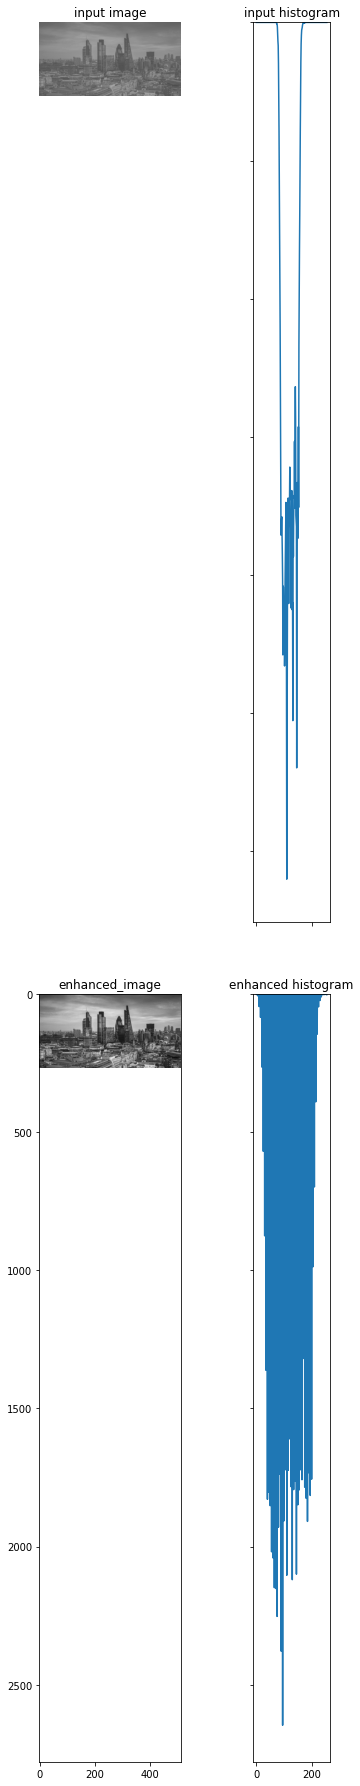

In [ ]:
img = cv2.imread('img2.jpg',cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(32,32))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('input histogram')
enhanced_image = stretch_hist(img)
grid[2].imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('enhanced_image')
grid[3].plot(calc_hist(enhanced_image))
grid[3].set_title('enhanced histogram')

Q2-Part3

In [ ]:



def modified_stretch_hist(image):
  ############
  # Your code
  # Start
  i , j = image.shape
  count1 = 0 
  count2 = 0
  hist =calc_hist(image)
  for a in range( 10 , 256):
   if hist[a] != 0:
     count1 = a
     break
  for b in range( 245 , 10 , -1):
    if hist[b] != 0:
      count2 = b
      break

  for k2 in range(0 ,i):
    for k3 in range(0 , j): 
        if image[k2][k3] <= 10 :
          image[k2][k3] = count1
        elif image[k2][k3] >= 245 :
          image[k2][k3] = count2
  output_image = stretch_hist(image)

  ############
  return output_image
  

test **(don't change next cell)**

Text(0.5, 1.0, 'enhanced histogram')

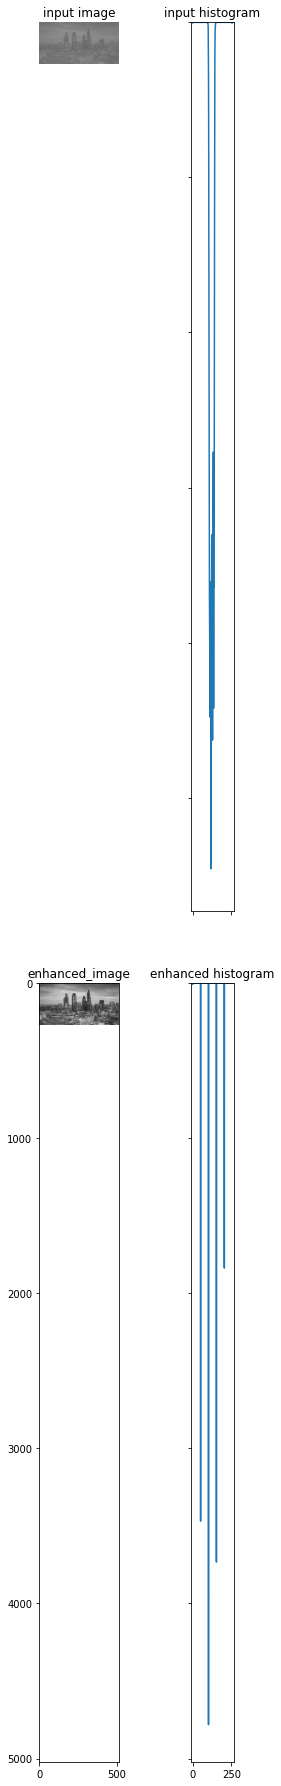

In [ ]:
img = cv2.imread('img4.jpg',cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(32,32))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('input image')
grid[0].axis('off')
grid[1].plot(calc_hist(img))
grid[1].set_title('input histogram')
enhanced_image = modified_stretch_hist(img)
grid[2].imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('enhanced_image')
grid[3].plot(calc_hist(enhanced_image))
grid[3].set_title('enhanced histogram')

Q2-Part 4

In [41]:


def find_T(image):
  i1 , i2  = image.shape
  hist = calc_hist(image)
  hist2 = np.zeros(256,dtype=int)
  hist3 = np.zeros(256,dtype=int)
  hist2[0] = hist[0]
  for k in range(1 , 256):
      hist2[k] = hist[k] + hist2[k-1]

  a = int(hist2[255])
  for k in range(0 , 256):
      hist3[k] = round(hist2[k] * (255/a))
  return hist3


  

def equalize_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram equalization
  '''

  # pixelMap = image.load()

  ############
  # Your code
  # Start
  i1 , i2  = image.shape
  T = find_T(image)
  

  
  

  for j1 in range(0 , i1 ):
    for  j2 in range(0 ,i2 ):
      for k in range(0 ,256):
        if image[j1,j2] == k:
          image[j1,j2]= T[k]

  output_image = image
  # End
  return output_image


test **(don't change next cell)**

Text(0.5, 1.0, 'histogram')

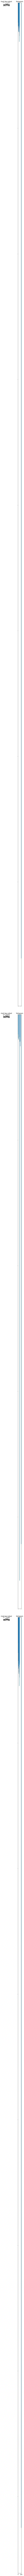

In [ ]:
img1 = cv2.imread('img2.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img3.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('img4.jpg',cv2.IMREAD_GRAYSCALE)



fig = plt.figure(figsize=(400,400))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(3, 2), 
                 axes_pad=1,  
                 )


eq_img1 = equalize_hist(img1)
grid[0].imshow(eq_img1,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('img2.jpg output')
grid[0].axis('off')
grid[1].plot(calc_hist(eq_img1))
grid[1].set_title('histogram')
eq_img2 = equalize_hist(img2)
grid[2].imshow(eq_img2,cmap='gray',vmin=0,vmax=255)
grid[2].set_title('img3.jpg output')
grid[2].axis('off')
grid[3].plot(calc_hist(eq_img2))
grid[3].set_title('histogram')
eq_img3 = equalize_hist(img3)
grid[4].imshow(eq_img3,cmap='gray',vmin=0,vmax=255)
grid[4].set_title('img4.jpg output')
grid[4].axis('off')
grid[5].plot(calc_hist(eq_img3))
grid[5].set_title('histogram')

Q3

In [52]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
  '''
  i1 , i2 , i3 = src_image.shape
  j1 , j2 , j3 = ref_image.shape
  ############
  # Your code
  # Start
  # Split
  redsrc = src_image[:, :, 0]
  greensrc = src_image[:, :, 1]
  bluesrc = src_image[:, :, 2]
  redref = ref_image[:, :, 0]
  greenref = ref_image[:, :, 1]
  blueref = ref_image[:, :, 2]
  # determine histograms 
  hist_redsrc = find_T(redsrc)
  hist_greensrc = find_T(greensrc)
  hist_bluesrc = find_T(bluesrc)
  hist_redref = find_T(redref)
  hist_greenref = find_T(greenref)
  hist_blueref = find_T(blueref)
  # for red

  for k in range(0 ,256):
    a = hist_redsrc[k]
    for k2 in range(0 ,256):
      if hist_redref[k2] == a :
        for n1 in range(0 , i1):
            for n2 in range(0 , i2):
              if redsrc[n1,n2] == k:
                  redsrc[n1,n2] = k2
                
  # for green
  for k in range(0 ,256):
     b = hist_greensrc[k]
     for k2 in range(0 ,256):
       if hist_greenref[k2] == b :
         for n1 in range(0 , i1):
            for n2 in range(0 , i2):
               if greensrc[n1,n2] == k :
                  greensrc[n1,n2] = k2
               
                

  # for green
  for k in range(0 ,256):
     c = hist_bluesrc[k]
     for k2 in range(0 ,256):
        if hist_blueref[k2] == c :
          for n1 in range(0 , i1):
              for n2 in range(0 , i2):
                  if bluesrc[n1,n2] == k :
                    bluesrc[n1,n2] = k2

  output_image = cv2.merge((bluesrc ,greensrc ,redsrc ))

  # End
  return output_image

test **(don't change next cell)**

(-0.5, 1199.5, 799.5, -0.5)

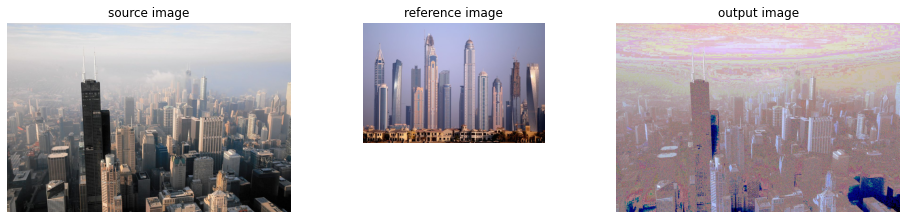

In [53]:
src = cv2.imread('src.jpg')
ref = cv2.imread('ref.jpg')
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 3), 
                 axes_pad=1,  
                 )


grid[0].imshow(src[:,:,::-1])
grid[0].set_title('source image')
grid[0].axis('off')
grid[1].imshow(ref[:,:,::-1])
grid[1].set_title('reference image')
grid[1].axis('off')
grid[2].imshow(hist_matching(src,ref)[:,:,::-1])
grid[2].set_title('output image')
grid[2].axis('off')